In [20]:
#Importing libraries
import re
import pandas as pd
import numpy as np
import math
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/Users/sneka/Downloads/extracted_data_with_contents_full.csv") 

In [3]:
data.head()

,ID,URL,Is lighting product?,Extracted_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...
2,P-2,https://myelektralite.com/assets/1018-AI-Outdo...,Yes,NaN
3,P-3,https://myelektralite.com/assets/1018-Data-She...,Yes,NaN
4,P-4,https://myelektralite.com/assets/1018AI-Data-S...,Yes,NaN


In [4]:
data.shape

(1013, 4)

In [5]:
data.isnull().sum()

ID                       13
URL                      13
Is lighting product?     13
Extracted_Content       277
dtype: int64

In [6]:
df = data.dropna()

In [7]:
df.head()

,ID,URL,Is lighting product?,Extracted_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...
12,P-12,https://en.everlight.com/wp-content/plugins/It...,No,"EVERLIGHT ELECTRONICS CO.,LTD. \n Everlight E..."
13,P-13,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights..."
14,P-14,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights..."


In [8]:
df.shape

(736, 4)

In [9]:
# Custom list of stopwords including common words and domain-specific terms
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["none", "some", "something", "another", "other", "more", "less", "many", "few", "and", "the", "for", "is", "to", "with"])  # Add additional terms as needed


In [10]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

In [11]:


def clean_text(text):
    # Check if the text is not NaN
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs and email addresses
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Remove non-alphanumeric characters and numerical values
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    word_tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_text = [word for word in word_tokens if word not in custom_stopwords]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    
    # Join the stemmed words back into a single string
    text = ' '.join(stemmed_text)
    
    return text

# Assuming df is your DataFrame and 'Extracted_Content' is the column containing text data
df['Cleaned_Content'] = df['Extracted_Content'].apply(clean_text)

/var/folders/27/wzmpkqfn1c3dpl904hw7bvvr0000gp/T/ipykernel_83237/3040397543.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Content'] = df['Extracted_Content'].apply(clean_text)


In [12]:
df.head()

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...,featur differ color beam configur avail alumin...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...,recommend use architectur landscap gener exter...
12,P-12,https://en.everlight.com/wp-content/plugins/It...,No,"EVERLIGHT ELECTRONICS CO.,LTD. \n Everlight E...",everlight electron coltd everlight electron co...
13,P-13,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date s...
14,P-14,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date d...


In [13]:
X = df['Cleaned_Content']
y = df['Is lighting product?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [14]:
X_train.shape

(588,)

In [15]:
X_test.shape

(148,)

In [16]:
custom_stopwords_list = list(custom_stopwords)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000,stop_words=custom_stopwords_list) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
X_train_tfidf

<588x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62116 stored elements in Compressed Sparse Row format>

In [18]:
df["Is lighting product?"].value_counts()

Is lighting product?
Yes    392
No     344
Name: count, dtype: int64

In [22]:
# Train the model
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [23]:
X_train.shape

(588,)

In [24]:
# Predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

In [25]:
X_test_tfidf.shape


(148, 1000)

In [26]:
# generate predictions
predictions = classifier.predict(X_test_tfidf)
predictions 

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 

In [27]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

# Display the DataFrame
print(predictions_df)

    Predictions
0            No
1           Yes
2           Yes
3           Yes
4           Yes
..          ...
143         Yes
144          No
145         Yes
146         Yes
147          No

[148 rows x 1 columns]


In [34]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy Score: 0.918918918918919
Confusion Matrix:
[[71 10]
 [ 2 65]]


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True positive class metrics
precision_positive = precision_score(y_test, y_pred, pos_label='Yes')
recall_positive = recall_score(y_test, y_pred, pos_label='Yes')
f1_score_positive = f1_score(y_test, y_pred, pos_label='Yes')

# True negative class metrics
precision_negative = precision_score(y_test, y_pred, pos_label='No')
recall_negative = recall_score(y_test, y_pred, pos_label='No')
f1_score_negative = f1_score(y_test, y_pred, pos_label='No')

print("Metrics for True positive (Is lighting product? = Yes):")
print("Precision:", precision_positive)
print("Recall:", recall_positive)
print("F1-score:", f1_score_positive)
print()

print("Metrics for True negative (Is lighting product? = No):")
print("Precision:", precision_negative)
print("Recall:", recall_negative)
print("F1-score:", f1_score_negative)


Metrics for True positive (Is lighting product? = Yes):
Precision: 0.8666666666666667
Recall: 0.9701492537313433
F1-score: 0.9154929577464789

Metrics for True negative (Is lighting product? = No):
Precision: 0.9726027397260274
Recall: 0.8765432098765432
F1-score: 0.922077922077922


USER INPUT - PREDICTIONS

In [46]:
# Function to preprocess user input and predict
def predict_lighting_product(user_input, confidence_threshold = 0.5):
    # Clean the user input
    cleaned_input = clean_text(user_input)
    # Vectorize the input
    user_input_tfidf = tfidf_vectorizer.transform([cleaned_input])
    # Make predictions
    prediction = classifier.predict(user_input_tfidf)
    # Display the prediction
    if prediction == 'Yes':
        return "The input is related to a lighting product."
    else:
        return "The input is not related to a lighting product."


In [48]:
# Example usage
user_input = input("Enter the text to classify: ")
#user_input = """Nominal Power and Lumens (2700K CCT, 70 CRI)"""

prediction = predict_lighting_product(user_input)
print(prediction)

The input is related to a lighting product.


In [49]:
# Generate predicted probabilities
predicted_probabilities = classifier.predict_proba(X_test_tfidf)
predicted_probabilities 

array([[0.90530347, 0.09469653],
       [0.3689295 , 0.6310705 ],
       [0.04631963, 0.95368037],
       [0.07863883, 0.92136117],
       [0.00700832, 0.99299168],
       [0.66355538, 0.33644462],
       [0.7838325 , 0.2161675 ],
       [0.07011114, 0.92988886],
       [0.57646979, 0.42353021],
       [0.01369669, 0.98630331],
       [0.8702744 , 0.1297256 ],
       [0.1526334 , 0.8473666 ],
       [0.38320686, 0.61679314],
       [0.95980752, 0.04019248],
       [0.22046427, 0.77953573],
       [0.629749  , 0.370251  ],
       [0.44727891, 0.55272109],
       [0.02408185, 0.97591815],
       [0.06967015, 0.93032985],
       [0.87807513, 0.12192487],
       [0.02176599, 0.97823401],
       [0.8424702 , 0.1575298 ],
       [0.86759819, 0.13240181],
       [0.22738788, 0.77261212],
       [0.13710075, 0.86289925],
       [0.04007848, 0.95992152],
       [0.00951656, 0.99048344],
       [0.88608683, 0.11391317],
       [0.84975103, 0.15024897],
       [0.94593884, 0.05406116],
       [0.

FEATURES OF BOTH THE CATEGORIES

In [50]:
# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the learned feature log probabilities for each class
feature_log_prob = classifier.feature_log_prob_

# Create a dictionary mapping feature names to their log probabilities for the lighting category
lighting_feature_prob = {feature: log_prob for feature, log_prob in zip(feature_names, feature_log_prob[1])}

# Sort the features by their log probabilities
sorted_lighting_features = sorted(lighting_feature_prob.items(), key=lambda x: x[1], reverse=True)

# Print the top N features associated with the lighting category
top_features = 20  
print(f"Top {top_features} features associated with the lighting category:")
for feature, log_prob in sorted_lighting_features[:top_features]:
    print(f"{feature}: {log_prob}")


Top 20 features associated with the lighting category:
mm: -4.770399435824778
light: -4.963092753870265
led: -4.965135906228907
lamp: -5.001494226504937
bulb: -5.183189755265026
lumen: -5.308910849508797
mount: -5.335734853962034
glass: -5.350974123730708
finish: -5.391809616424755
brass: -5.44478988276969
white: -5.448796012866749
cm: -5.487222247059977
black: -5.516701286743524
avail: -5.557798785468689
wall: -5.578621012508062
cri: -5.630266505090168
lm: -5.630343024767349
fixtur: -5.643375816543618
color: -5.6449877151546834
seri: -5.676449137427983


In [51]:
# Get the learned feature log probabilities for each class
feature_log_prob = classifier.feature_log_prob_

# Create a dictionary mapping feature names to their log probabilities for the non-lighting category
non_lighting_feature_prob = {feature: log_prob for feature, log_prob in zip(feature_names, feature_log_prob[0])}

# Sort the features by their log probabilities
sorted_non_lighting_features = sorted(non_lighting_feature_prob.items(), key=lambda x: x[1], reverse=True)

# Print the top N features associated with the non-lighting category
top_features = 20  
print(f"Top {top_features} features associated with the non-lighting category:")
for feature, log_prob in sorted_non_lighting_features[:top_features]:
    print(f"{feature}: {log_prob}")


Top 20 features associated with the non-lighting category:
mm: -4.6077115050630155
control: -5.081316162559414
de: -5.14707309031975
sensor: -5.338550991740296
cabl: -5.441397949636756
system: -5.445854356079122
wire: -5.467391496903831
power: -5.506045532325476
nvent: -5.528455895591614
use: -5.6006686488803865
switch: -5.644801137655932
product: -5.731654085729635
standard: -5.737388971713413
cm: -5.758341292512583
load: -5.77326139338942
vac: -5.778566148620279
scale: -5.799299908640819
steel: -5.80127369987852
instal: -5.8017459832210445
mount: -5.830915115992781


TO COMPARE THE USER INPUT AND CLEANED TEXT

In [52]:
def predict_lighting_product(user_input):
    # Clean the user input
    cleaned_input = clean_text(user_input)
    # Vectorize the input
    user_input_tfidf = tfidf_vectorizer.transform([cleaned_input])
    # Make predictions
    prediction = classifier.predict(user_input_tfidf)
    # Display the prediction
    if prediction == 'Yes':
        result = "The input is related to a lighting product."
    else:
        result = "The input is not related to a lighting product."
    return cleaned_input, result


In [53]:
# Example usage

#user_input = input("Enter the text to classify: ")
user_input = """            
Universal backplate
Wall
4.375"
9.50"
6.00"
10.00"
5.00"
5.625"
10.00"
Universal e
Sidescrew
Sidescrew
FRONT 
ALL WORK © 2016 CURREY & COMPANY
5000-0051
TOP 
SIDE 

  """
cleaned_input, prediction = predict_lighting_product(user_input)
print("Cleaned Text:", cleaned_input)

print("Prediction:", prediction)


Cleaned Text: univers backplat wall univers e sidescrew sidescrew front work currey compani top side
Prediction: The input is related to a lighting product.


In [54]:
y_test.shape

(148,)

In [55]:
X_test.shape

(148,)

TEST DATA

In [185]:
test_data = pd.read_csv("/Users/sneka/Downloads/extracted_data_with_contents_full_test.csv")

In [186]:
test_data.head()

,ID,URL,Is lighting product?,Extracted_Content
0,TP0,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...
1,TP1,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...
2,TP2,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...
3,TP3,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...
4,TP4,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...


In [187]:
test_data.shape

(80, 4)

In [115]:
# test_data['Cleaned_Content'] = test_data['Extracted_Content'].apply(clean_text)

In [116]:
# X_test_data_tfidf = tfidf_vectorizer.transform(test_data['Cleaned_Content'])


In [117]:
# X_test_data_tfidf.shape

In [118]:
# y_pred_test = classifier.predict(X_test_data_tfidf)

In [119]:
# y_pred.shape

In [120]:
# test_predictions = classifier.predict(X_test_data_tfidf)
# test_predictions 

In [121]:
# # Calculate accuracy score for the test data
# test_accuracy = accuracy_score(test_data['Is lighting product?'], test_predictions)
# print("Test Accuracy Score:", test_accuracy)

In [122]:
# test_conf_matrix = confusion_matrix(test_data['Is lighting product?'], test_predictions)
# print("Test Confusion Matrix:")
# print(test_conf_matrix)

In [231]:
pd.DataFrame(test_predictions)

,0
0,0
1,0
2,0
3,0
4,0
...,...
75,0
76,0
77,0
78,0


In [232]:
test_data["Is lighting product?"].value_counts()

Is lighting product?
0    60
1    20
Name: count, dtype: int64

In [233]:
test_data.loc[test_data['Is lighting product?']==1]

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content
7,TP7,https://www.assets.signify.com/is/content/Sign...,1,"TD518348EN \nJanuary 21, 2019 1:53 PM\nE44 4"" ...",tden januari pm e trim seri order inform sampl...
8,TP8,https://www.assets.signify.com/is/content/Sign...,1,"TD518348EN \nJanuary 21, 2019 1:53 PM\nE44 4"" ...",tden januari pm e trim seri order inform sampl...
9,TP9,https://www.assets.signify.com/is/content/Sign...,1,"TD518348EN \nJanuary 21, 2019 1:53 PM\nE44 4"" ...",tden januari pm e trim seri order inform sampl...
10,TP10,https://www.assets.signify.com/is/content/Sign...,1,C ATA L O G # :\nT Y P E :\nSpecification grad...,c ata l o g t y p e specif grade a lamp fixtur...
11,TP11,https://www.assets.signify.com/is/content/Sign...,1,C ATA L O G # :\nT Y P E :\nSpecification grad...,c ata l o g t y p e specif grade a lamp fixtur...
12,TP12,https://www.assets.signify.com/is/content/Sign...,1,"TD518347EN \nJune 5, 2019 5:31 PM\nE44 4"" Trim...",tden june pm e trim seri order inform sampl nu...
13,TP13,https://www.assets.signify.com/is/content/Sign...,1,"TD518347EN \nJune 5, 2019 5:31 PM\nE44 4"" Trim...",tden june pm e trim seri order inform sampl nu...
14,TP14,https://www.assets.signify.com/is/content/Sign...,1,"TD518347EN \nJune 5, 2019 5:31 PM\nE44 4"" Trim...",tden june pm e trim seri order inform sampl nu...
15,TP15,https://www.assets.signify.com/is/content/Sign...,1, \n \n \n \n \n \n \n \n ...,cooper light solut discontinu visit our web si...
16,TP16,https://www.cooperlighting.com/api/assets/v1/f...,1,Lighting Solutions\nCanless EZ-Trim\nLamp Base...,light solut canless eztrim lamp base canless d...


In [ ]:
data.head()

,ID,URL,Is lighting product?,Extracted_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...
2,P-2,https://myelektralite.com/assets/1018-AI-Outdo...,Yes,NaN
3,P-3,https://myelektralite.com/assets/1018-Data-She...,Yes,NaN
4,P-4,https://myelektralite.com/assets/1018AI-Data-S...,Yes,NaN


In [217]:
test_predictions = classifier.predict(X_test_data_tfidf)
test_predictions 

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [223]:
X_test_data_tfidf

<80x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 13986 stored elements in Compressed Sparse Row format>

IDENTITYFYING MISCLASSIFIED CASES

In [80]:
# Train the model
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions on the train set
y_train_pred = classifier.predict(X_train_tfidf)

# Predictions on the test set
y_test_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy score for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy Score:", train_accuracy)

# Generate confusion matrix for train set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Set):")
print(conf_matrix_train)

# Calculate accuracy score for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy Score:", test_accuracy)

# Generate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)



Training Accuracy Score: 0.9710884353741497
Confusion Matrix (Train Set):
[[251  12]
 [  5 320]]
Test Accuracy Score: 0.9256756756756757
Confusion Matrix (Test Set):
[[72  9]
 [ 2 65]]


In [81]:
X_train.head()

228    dropin incandesc replac consum less than watt ...
745    lrwd mod led recess wall direct currentlightin...
697    ci riserviamo il diritto di modificar le speci...
491    length height height width lb product name dri...
259    euri light i a divis of irtronix inc normandi ...
Name: Cleaned_Content, dtype: object

In [83]:
# Create a DataFrame to store ID, URL, actual label, and predicted label for training data
train_results = pd.DataFrame({'ID': X_train.index,
                              'URL': df.loc[X_train.index, 'URL'],
                              'Actual': y_train,
                              'Predicted': y_train_pred})

# Find misclassifications in the training data
train_misclassifications = train_results[train_results['Actual'] != train_results['Predicted']]

# Print misclassifications
print("Misclassifications in the training data:")
print(train_misclassifications)


Misclassifications in the training data:
      ID                                                URL Actual Predicted
90    90  https://www.b-td.com/s/INOS_SideTable_TechShee...     No       Yes
931  931  https://matthewsfanco.com/wp-content/uploads/B...     No       Yes
538  538  https://prod-edam.honeywell.com/content/dam/ho...    Yes        No
52    52  https://www.hatcocorp.com/cms/SPECSHEETS/00000...     No       Yes
646  646  https://www.gripple.com/umbraco/Surface/Produc...     No       Yes
82    82  https://www.b-td.com/s/530LoungeChair_TechShee...     No       Yes
828  828  https://cdn.currentlighting.com/site/specsheet...    Yes        No
111  111  https://www.houseofantiquehardware.com/Product...     No       Yes
244  244  https://dl.pharoscontrols.com/documentation/da...    Yes        No
314  314  https://www.mullanlighting.com/us/mst_attachme...     No       Yes
829  829  https://cdn.currentlighting.com/site/specsheet...     No       Yes
780  780  https://cdn.currentlighti

In [84]:
# Save training misclassifications to a CSV file
train_misclassifications.to_csv("training_misclassifications.csv", index=False)


In [85]:
# Create a DataFrame to store ID, URL, actual label, and predicted label for test data
test_results = pd.DataFrame({'ID': X_test.index,
                             'URL': df.loc[X_test.index, 'URL'],
                             'Actual': y_test,
                             'Predicted': y_test_pred})

# Find misclassifications in the test data
test_misclassifications = test_results[test_results['Actual'] != test_results['Predicted']]

# Print misclassifications
print("Misclassifications in the test data:")
print(test_misclassifications)


Misclassifications in the test data:
      ID                                                URL Actual Predicted
675  675  https://cdn.currentlighting.com/site/specsheet...     No       Yes
110  110  https://www.houseofantiquehardware.com/Product...     No       Yes
88    88   https://www.b-td.com/s/GridworkShelf_Cabinet.pdf     No       Yes
770  770  https://cdn.currentlighting.com/site/specsheet...    Yes        No
822  822  https://cdn.currentlighting.com/site/specsheet...    Yes        No
124  124  https://www.sstlighting.com/CatalogPages/Drive...     No       Yes
315  315  https://www.mullanlighting.com/us/mst_attachme...     No       Yes
89    89  https://www.b-td.com/s/INOSCoffeeTable_TechShe...     No       Yes
12    12  https://en.everlight.com/wp-content/plugins/It...     No       Yes
104  104  https://www.houseofantiquehardware.com/Product...     No       Yes
114  114    http://primolanterns.com/img/Drawings/AT-22.pdf     No       Yes


In [86]:
# Save test misclassifications to a CSV file
test_misclassifications.to_csv("test_misclassifications.csv", index=False)


In [91]:
# Iterate through the entire dataset to identify correctly classified cases along with URLs
correctly_classified_cases = []
for i in range(len(y_combined)):
    if y_combined.iloc[i] == y_combined_pred[i]:
        if i < len(X_train):
            url = df.iloc[i]['URL']
            content = X_train.iloc[i]
            true_label = y_train.iloc[i]
        else:
            test_index = i - len(X_train)
            url = df.iloc[test_index]['URL']
            content = X_test.iloc[test_index]
            true_label = y_test.iloc[test_index]
        predicted_label = y_combined_pred[i]
        correctly_classified_cases.append((url, content, true_label, predicted_label))

print("Correctly Classified Cases in the Combined Dataset:")
for case in correctly_classified_cases:
    print("URL:", case[0])
    print("Content:", case[1])
    print("True Label:", case[2])
    print("Predicted Label:", case[3])
    print()


Correctly Classified Cases in the Combined Dataset:
URL: https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.usrfiles.com/ugd/a4b6eb_617bfed66731495e997bcacd789777ad.pdf
Content: dropin incandesc replac consum less than watt up to energi save lamp warranti year easi instal dropin replac for vdc and vdc par incandesc lamp white led oper life up to hour low power draw smaller wattag put less load on the electr system cool oper gener onli a neglig amount of heat even light high intens no halat solid state highshock highvibr resist led medium cluster of led weatherproof moistur and dust resist check ledtronicscom for latest data print materi may be outdat featur specif applic emerg egress light headlight marker turn signal spotlight log rev custom option for qualifi applic largequant oem order ideal for use with altern or renew energi resourc solar wind power specif subject to chang without notic volt version have applic as headlight for forklift industri vehicl golf cart architectur accent light

In [92]:
len(correctly_classified_cases)

708

TEST DATA UNKNOWN PREDICTION

In [188]:

# Preprocess the text data in the separate test dataset
test_data['Cleaned_Content'] = test_data['Extracted_Content'].apply(clean_text)


In [189]:
test_data.head()

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content
0,TP0,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
1,TP1,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
2,TP2,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
3,TP3,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...,lxf lxt lexington lumen tabl streetwork psen p...
4,TP4,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...,lxf lxt lexington lumen tabl streetwork psen p...


In [190]:

# TF-IDF Vectorization
X_test_unknown_tfidf = tfidf_vectorizer.transform(test_data['Cleaned_Content'])


In [192]:
X_test_unknown_tfidf.shape

(80, 1000)

In [193]:
# Predictions on the separate test dataset
y_pred_unknown = classifier.predict(X_test_unknown_tfidf)
y_pred_unknown


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype='<U3')

In [194]:

# Create a DataFrame to store ID, URL, actual label, and predicted label for the separate test dataset
test_results_unknown = pd.DataFrame({'ID': test_data.index,
                                     'URL': test_data['URL'],
                                     'Actual': test_data['Is lighting product?'],
                                     'Predicted': y_pred_unknown})




In [195]:
test_results_unknown

,ID,URL,Actual,Predicted
0,0,https://cdn.currentlighting.com/site/specsheet...,0,No
1,1,https://cdn.currentlighting.com/site/specsheet...,0,No
2,2,https://cdn.currentlighting.com/site/specsheet...,0,No
3,3,https://www.assets.signify.com/is/content/Sign...,0,No
4,4,https://www.assets.signify.com/is/content/Sign...,0,No
...,...,...,...,...
75,75,https://www.usailighting.com/site/view.php?id=...,0,Yes
76,76,https://www.usailighting.com/site/view.php?id=...,0,No
77,77,https://www.usailighting.com/site/view.php?id=...,0,No
78,78,https://www.usailighting.com/site/view.php?id=...,0,No


In [196]:
# Find misclassifications in the separate test dataset
test_misclassifications_unknown = test_results_unknown[test_results_unknown['Actual'] != test_results_unknown['Predicted']]


In [197]:
test_misclassifications_unknown

,ID,URL,Actual,Predicted
0,0,https://cdn.currentlighting.com/site/specsheet...,0,No
1,1,https://cdn.currentlighting.com/site/specsheet...,0,No
2,2,https://cdn.currentlighting.com/site/specsheet...,0,No
3,3,https://www.assets.signify.com/is/content/Sign...,0,No
4,4,https://www.assets.signify.com/is/content/Sign...,0,No
...,...,...,...,...
75,75,https://www.usailighting.com/site/view.php?id=...,0,Yes
76,76,https://www.usailighting.com/site/view.php?id=...,0,No
77,77,https://www.usailighting.com/site/view.php?id=...,0,No
78,78,https://www.usailighting.com/site/view.php?id=...,0,No


In [198]:

# Save misclassifications to a CSV file
test_misclassifications_unknown.to_csv("test_misclassifications_unknown.csv", index=False)


In [199]:
# Convert string labels to numerical labels
test_results_unknown['Predicted'] = test_results_unknown['Predicted'].map({'Yes': 1, 'No': 0})

# Calculate accuracy score for the separate test dataset
accuracy_unknown = accuracy_score(test_results_unknown['Actual'], test_results_unknown['Predicted'])
print("Accuracy Score for Separate Test Dataset:", accuracy_unknown)

# Generate confusion matrix for the separate test dataset
conf_matrix_unknown = confusion_matrix(test_results_unknown['Actual'], test_results_unknown['Predicted'])
print("Confusion Matrix for Separate Test Dataset:")
print(conf_matrix_unknown)


Accuracy Score for Separate Test Dataset: 0.675
Confusion Matrix for Separate Test Dataset:
[[37 23]
 [ 3 17]]


FOR A SAMPLE URL

In [201]:
# Load the test data
test_data = pd.read_csv("/Users/sneka/Downloads/extracted_data_with_contents_full_test.csv").dropna()  # Replace "test.csv" with the path to your test dataset

# Preprocess the text data in the test dataset
test_data['Cleaned_Content'] = test_data['Extracted_Content'].apply(clean_text)

In [202]:
test_data.shape

(80, 5)

In [203]:
test_data.head()

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content
0,TP0,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
1,TP1,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
2,TP2,https://cdn.currentlighting.com/site/specsheet...,0,Synchron AC Power System Suggested Specificati...,synchron ac power system suggest specif dualli...
3,TP3,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...,lxf lxt lexington lumen tabl streetwork psen p...
4,TP4,https://www.assets.signify.com/is/content/Sign...,0,LXF / LXT Lexington Lumen Tables\nStreetworks\...,lxf lxt lexington lumen tabl streetwork psen p...


In [204]:
# Vectorize the preprocessed test data using TF-IDF vectorizer
X_test_tfidf_unknown = tfidf_vectorizer.transform(test_data['Cleaned_Content'])

In [205]:
X_test_tfidf_unknown.shape

(80, 1000)

In [213]:
#Predictions on the test dataset
y_pred_unknown = classifier.predict(X_test_tfidf_unknown)


In [214]:
y_pred_unknown

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype='<U3')

In [220]:
#Convert string labels to numerical labels
y_pred_unknown_numeric = [1 if label == 'Yes' else 0 for label in y_pred_unknown]


SHAP

In [34]:
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# Print a few samples of X_train and X_test
print("Sample of X_train:")
print(X_train.head())

print("\nSample of X_test:")
print(X_test.head())


Sample of X_train:
228    dropin incandesc replac consum watt energi sav...
745    lrwd mod led recess wall direct currentlightin...
697    ci riserviamo il diritto di modificar le speci...
491    length height height width lb product name dri...
259    euri light divis irtronix inc normandi avenu b...
Name: Cleaned_Content, dtype: object

Sample of X_test:
909    sunstat connectplu wifi programm touchscreen t...
57     project item quantiti oper locat safeti inform...
749    lwsd mod led wallslot direct currentlightingco...
306    mlwlantbr antiqu brass brass glass materi fix ...
381    finish brass black hardwir socket type e volta...
Name: Cleaned_Content, dtype: object


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)


In [37]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train_transformed, y_train)


MultinomialNB()

In [38]:
# import shap

# # Create a KernelExplainer instance
# explainer = shap.KernelExplainer(clf_nb.predict_proba, X_train_transformed)

# # Compute SHAP values for the test data
# shap_values = explainer.shap_values(X_test_transformed)


In [39]:
# For example, using shap.sample
background_samples = shap.sample(X_train_transformed, 10)  # Adjust the number of samples as needed
explainer = shap.KernelExplainer(clf_nb.predict_proba, background_samples)


In [40]:
X_test_dense = X_test_transformed.toarray()


In [41]:
X_test_dense.shape

(148, 16140)

In [43]:
shap_values = explainer.shap_values(X_test_transformed)

100%|██████████| 148/148 [36:10<00:00, 14.67s/it]


In [46]:
print(shap_values)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


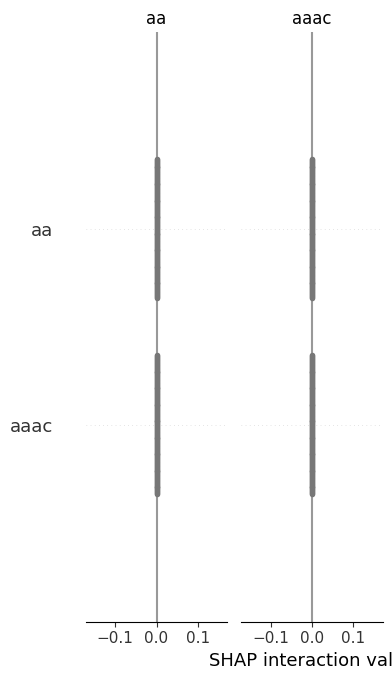

In [44]:
# Visualize summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=vectorizer.get_feature_names_out())


FOR ONE INSTANCE

In [47]:
# Select a single instance from the test data (for example, the first instance)
instance_index = 0  # Change this index to select a different instance
single_instance = X_test_transformed[instance_index]


In [48]:
# Create a KernelExplainer instance
explainer = shap.KernelExplainer(clf_nb.predict_proba, X_train_transformed)


Using 588 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [88]:
# shap_values_single = explainer.shap_values(single_instance)


In [89]:
# single_instance_dense = single_instance.toarray()
# shap_values_single = explainer.shap_values(single_instance_dense)


In [90]:
# import shap

# # Sample a subset of the training data to use as background data
# background_samples = shap.sample(X_train_transformed, 100)

# # Create a KernelExplainer instance using the sampled background data
# explainer_kernel = shap.KernelExplainer(clf_nb.predict_proba, background_samples)

# # Compute SHAP values for the single instance using KernelExplainer
# shap_values_single = explainer_kernel.shap_values(single_instance_dense_array)

# # Visualize SHAP values for the single instance
# shap.force_plot(explainer_kernel.expected_value[1], shap_values_single[1], feature_names=feature_names)
